In [1]:
import apss_lib
import numpy as np
%matplotlib inline

2021-03-06 00:48:45.085705


In [2]:
names = ["UTC",\
         "sol",\
         "LTST",\
         "Ls",\
         "sun_azimuth",\
         "sun_phase_angle_1",\
         "incidence_angle_1",\
         "sigma_sun_phase_angle_1",\
         "sigma_incidence_angle_1",\
         "shadow_1",\
         "sun_phase_angle_2",\
         "incidence_angle_2",\
         "sigma_sun_phase_angle_2",\
         "sigma_incidence_angle_2",\
         "shadow_2",\
         "TS_1",\
         "TS_2",\
         "dTS_1",\
         "dTS_2"]

In [3]:
folder = "/home/aspiga/data/InSight/HP3_RAD/"
folder = "https://pds-geosciences.wustl.edu/insight/urn-nasa-pds-insight_rad/data_derived/"

In [4]:
fitab = []
fitab.append("hp3_rad_der_00014_20181211_073042.tab") # PDS RELEASE 1
fitab.append("hp3_rad_der_00122_20190401_123217.tab") # PDS RELEASE 2
fitab.append("hp3_rad_der_00213_20190703_052044.tab") # PDS RELEASE 3
fitab.append("hp3_rad_der_00305_20191006_053040.tab") # PDS RELEASE 4
fitab.append("hp3_rad_der_00390_20200101_120222.tab") # PDS RELEASE 5
fitab.append("hp3_rad_der_00478_20200401_121608.tab") # PDS RELEASE 6
fitab.append("hp3_rad_der_00567_20200701_125545.tab") # PDS RELEASE 7

In [5]:
datatab = []
for tabtab in fitab:
    print tabtab
    data = np.genfromtxt(folder+tabtab,dtype=None,names=names,filling_values=(np.nan))
    datatab.append(data)

hp3_rad_der_00014_20181211_073042.tab


/home/aspiga/conda/miniconda2/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.


hp3_rad_der_00122_20190401_123217.tab
hp3_rad_der_00213_20190703_052044.tab
hp3_rad_der_00305_20191006_053040.tab
hp3_rad_der_00390_20200101_120222.tab
hp3_rad_der_00478_20200401_121608.tab
hp3_rad_der_00567_20200701_125545.tab


In [6]:
data = np.genfromtxt(\
        "/home/aspiga/data/InSight/HP3_RAD/release_8_partial_archive/hp3_rad_der_00660_20201004_102825.tab",\
        dtype=None,names=names,filling_values=(np.nan))
datatab.append(data)

/home/aspiga/conda/miniconda2/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [7]:
ts,te = 10,15
#ts,te = 12,13
#ts,te = 8,17
#ts,te = 11,15
#ts,te = 12,14
#ts,te = 11,13
ts,te = 11,14 # paper
#####################################
ts,te = 12,13 # for recent sols
ts,te = 1,3
#ts,te = 5,6

In [8]:
#####################################
#####################################
######## BOUNDING
ltst = np.array([])
localt = np.array([])
time = np.array([])
field = np.array([])
for ddd in datatab:
    ###
    ltst2 = ddd["LTST"]
    idx = (ltst2 >= ts)*(ltst2 <= te)
    w = np.where(idx)
    ###
    localt2 = ddd["LTST"][w]
    time2 = ddd["sol"][w] + (localt2/24.)
    field2 = ddd["TS_2"][w]
    ###
    ltst = np.append(ltst,ltst2)
    localt = np.append(localt,localt2)
    time = np.append(time,time2)
    field = np.append(field,field2)    
######## BOUNDING
#####################################
#####################################
######## BINNING
dcmp,intp = np.modf(time)
sols = np.array([])
vals = np.array([])
enough_for_bins = False #True
for val in np.unique(intp):
    w = np.where(intp == val)
    if enough_for_bins:
        if (np.min(localt[w])>ts+1) or (np.max(localt[w])<te-1):
            print "REMOVED", val, ts,np.min(localt[w]),np.max(localt[w]),te
    else:
        selec = field[w]
        vals = np.append(vals,np.mean(selec))
        sols = np.append(sols,val+(te+ts)/48.)
time = sols
field = vals
######## BINNING
#####################################
#####################################
## sol 97 anomalous
field[np.floor(time) == 97] = np.nan
############ SAVE
fifi = open('tsurf_bins_LT_%i_%i.txt' % (ts,te), 'w')
for ii in range(len(field)):
    fifi.write("%10.3f %10.4f\n" % (time[ii],field[ii]))
fifi.close()

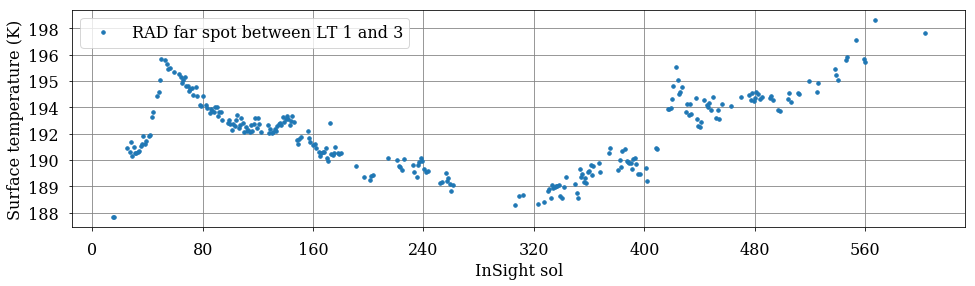

In [9]:
import ppplot
ppplot.changefont(16)
ppplot.changemarkersize(7)
fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f = field
pl.legend = "RAD far spot between LT %i and %i" % (ts,te)
pl.x = time
#pl.xmin = 0
#pl.xmax = 150
pl.nxticks = 10
#pl.ymin = 276
#pl.ymax = 290
#pl.nyticks = 7
pl.xlabel = "InSight sol"
pl.ylabel = "Surface temperature (K)"
pl.linestyle = ''
pl.marker = '.'
pl.make()
#ppplot.save(mode="pdf",filename="tsurf_%i_%i" % (ts,te))
ppplot.show()